<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/24_third_project_salary_analysis(barh_median%2Bcount).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


here we dont have anything to do with the skills, so we dont need explode.


we just need job_title_short and job_salary

In [ ]:
# df_Ir['job_title_short'].value_counts()

In [ ]:
# df_Ir = df[df['job_country'] == 'Ireland'].copy()

df_Ir= df.copy()

df_Ir = df_Ir.dropna(subset=['salary_year_avg'])

job_order1 = df_Ir['job_title_short'].value_counts().index[:6].tolist()

df_Ir_top6 = df_Ir[df_Ir['job_title_short'].isin(job_order1)]

job_order2= df_Ir_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True).index

df_Ir_top6

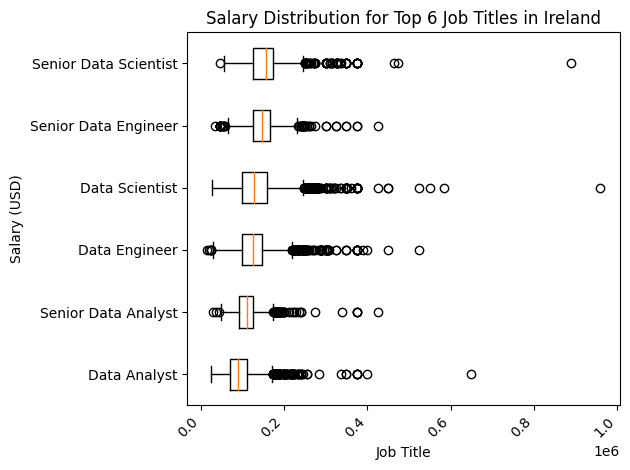

In [ ]:
fig, ax = plt.subplots(1, 1)

data = [df_Ir_top6[df_Ir_top6['job_title_short'] == job]['salary_year_avg'] for job in job_order2]
ax.boxplot(data, labels=job_order2, vert=False)

plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution for Top 6 Job Titles in Ireland')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

# Second example

In [ ]:
df_Ir = df_Ir.dropna(subset=['salary_year_avg'])

df_Ir_exploded = df_Ir.explode('job_skills')

skill_stats = df_Ir_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

# Mrrrr. here in the skill_stats we have both median and count

# skill_stats = df_Ir_exploded.groupby('job_skills').agg(median_salary=('salary_year_avg', 'median'), skill_count=('job_skills', 'count'))

skill_stats.head(10)

,median,count
job_skills,,
airflow,147090.50,1497
airtable,102500.00,22
alteryx,115000.00,386
angular,130000.00,113
angular.js,127050.00,2
ansible,125000.00,128
apl,90000.00,2
arch,110002.50,8
asana,100000.00,33


In [ ]:
#
top_paid = skill_stats.sort_values(by='median', ascending=False).head(10)

skill_count= skill_stats.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

print(top_paid.head(10))
print(skill_count.head(10))

                median  count
job_skills                   
debian        196500.0      1
ringcentral   182500.0      2
mongo         173500.0    256
lua           170500.0      1
watson        157500.0     31
dplyr         157500.0     19
haskell       157500.0      3
hugging face  157500.0     37
asp.net core  155000.0      1
solidity      152500.0     10
              median  count
job_skills                 
spark       140000.0   4016
aws         135000.0   4949
java        134241.0   2756
python      125000.0  12869
azure       125000.0   3466
sql         120000.0  12951
r           119550.0   5088
tableau     111175.0   4814
sas         110000.0   3132
excel        92500.0   3822


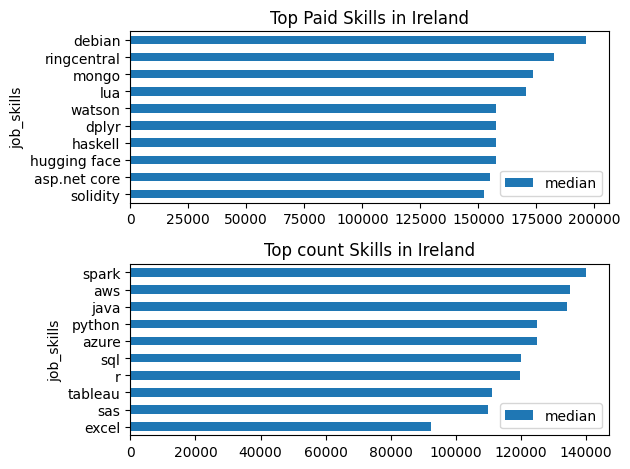

In [ ]:
fig, ax = plt.subplots(2,1)
top_paid.plot(kind='barh', ax=ax[0], y='median', title='Top Paid Skills in Ireland')
ax[0].invert_yaxis()

skill_count.plot(kind='barh', ax=ax[1], y='median', title='Top count Skills in Ireland')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

more detailed plot


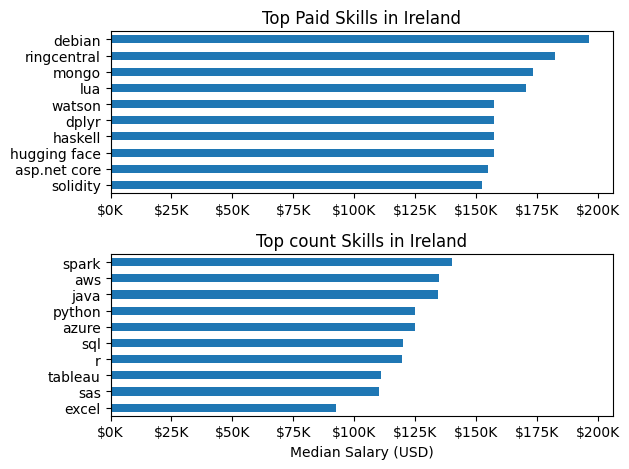

In [ ]:


fig, ax = plt.subplots(2,1)
top_paid.plot(kind='barh', ax=ax[0], y='median', legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top Paid Skills in Ireland')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


skill_count.plot(kind='barh', ax=ax[1], y='median',  legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top count Skills in Ireland')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()